In [166]:
import georinex as gr
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from pyproj import Transformer
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

from sv_functions import *

In [167]:
def return_date(chip_short, material):
    if material == 'clean':
        if chip_short == 'wide':
            date = f'190524'
        elif chip_short == 'normal':
            date = f'150524'
        elif chip_short == 'tight':
            date = f'150524'
    elif material == 'brick':
        if chip_short == 'wide':
            date = f'230524_8'
        elif chip_short == 'normal':
            date = f'190524'
        elif chip_short == 'tight':
            date = f'150524'
    elif material == 'glass':
        if chip_short == 'wide':
            date = f'270524'
        elif chip_short == 'normal':
            date = f'190524'
        elif chip_short == 'tight':
            date = f'270524'
    elif material == 'metal':
        if chip_short == 'wide':
            date = f'270524'
        elif chip_short == 'normal':
            date = f'270524'
        elif chip_short == 'tight':
            date = f'270524'

    return date


def calculate_circle(center_x, center_y, radius=5, num_points=8):
    theta = np.linspace(0, 2*np.pi, num_points)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    return x, y

def get_edges_of_polygon(theta, r, radius=5, num_points=8):
    circle_x = np.array([])
    circle_y = np.array([])
    for i in range(len(theta)):
        circle_x_calc, circle_y_calc = calculate_circle(theta[i], r[i], radius=radius, num_points=num_points)
        circle_x = np.append(circle_x,circle_x_calc)
        circle_y = np.append(circle_y,circle_y_calc)

    all_points = np.column_stack((circle_x.flatten(), circle_y.flatten()))

    hull = ConvexHull(all_points)
    edge_idx = hull.vertices
    edge_points = all_points[edge_idx]
    edges_x = edge_points[:,0]
    edges_y = edge_points[:,1]

    return edges_x, edges_y


In [3]:
## brick building with L5, 10m away
# 3633416 is right-handed
# 3632777 is left-handed
#date = "090324"
#date = "100424"
#path = f"../Data/brick_wall/10m/{date}/"
#
#if date == "100424":
#    obs_aux = gr.load(f"{path}brickwall_3633416_10m.obs",use="G")
#    obs_main = gr.load(f"{path}brickwall_3632777_10m.obs",use="G")
#    nav_aux = gr.load(f"{path}brickwall_3633416_10m_gps.nav")
#    nav_main = gr.load(f"{path}brickwall_3632777_10m_gps.nav")
#else:
#    obs_main = gr.load(f"{path}brickwall_3633416_10m.obs",use="G")
#    obs_aux = gr.load(f"{path}brickwall_3632777_10m.obs",use="G")
#    nav_main = gr.load(f"{path}brickwall_3633416_10m_gps.nav")
#    nav_aux = gr.load(f"{path}brickwall_3632777_10m_gps.nav")

## metal building with L5, 10m away
# 3633416 is right-handed
# 3632777 is left-handed
#date = "290324"
#path = f"../Data/metal_wall/10m/{date}/"
#
#obs_main = gr.load(f"{path}metalwall_3633416_10m.obs",use="G")
#obs_aux = gr.load(f"{path}metalwall_3632777_10m.obs",use="G")
#nav_main = gr.load(f"{path}metalwall_3633416_10m_gps.nav")
#nav_aux = gr.load(f"{path}metalwall_3632777_10m_gps.nav")

## glass building with L5, 10m away
# 3633416 is right-handed
# 3632777 is left-handed
#date = "110424"
#date = "290324"
#path = f"../Data/glass_wall/10m/{date}/"

#if date == "110424":
#    obs_aux = gr.load(f"{path}glasswall_3633416_10m.obs",use="G")
#    obs_main = gr.load(f"{path}glasswall_3632777_10m.obs",use="G")
#    nav_aux = gr.load(f"{path}glasswall_3633416_10m_gps.nav")
#    nav_main = gr.load(f"{path}glasswall_3632777_10m_gps.nav")
#else:
#    obs_main = gr.load(f"{path}glasswall_3633416_10m.obs",use="G")
#    obs_aux = gr.load(f"{path}glasswall_3632777_10m.obs",use="G")
#    nav_main = gr.load(f"{path}glasswall_3633416_10m_gps.nav")
#    nav_aux = gr.load(f"{path}glasswall_3632777_10m_gps.nav")


#path="../Data/testing/"
## only for when comparing to matlab script
#obs_main = gr.load(f'{path}SEPT0620.22O')
#nav_main = gr.load(f'{path}SEPT0623.22N')

date = "170424"
path = f"../Data/clear_wall/{date}/"

obs_main = gr.load(f'{path}clear_3632777.obs',use='G')
nav_main = gr.load(f'{path}clear_3632777_gps.nav')

if 'glass' in path:
    wall_type = 'glass'
    perp_from_wall = 195 # deg
elif 'metal' in path:
    wall_type = 'metal'
    perp_from_wall = 286 # deg
elif 'brick' in path:
    wall_type = 'brick'
    perp_from_wall = 106 # deg
else:
    wall_type = ''
    perp_from_wall = None

title_string = f'10 m to {wall_type} wall'

In [243]:
## RINEX files from GNSS-SDR

material = f'clean'
# material = f'brick'
# material = f'metal'
# material = f'glass'

signal = f'L1+L5'

chip_spacing = 'chip_0.5narrow_0.15'
# chip_spacing = 'chip_0.8narrow_0.3'
# chip_spacing = 'chip_0.2narrow_0.1'

if 'chip_0.8' in chip_spacing:
    chip_short = 'wide'
elif 'chip_0.5' in chip_spacing:
    chip_short = 'normal'
elif 'chip_0.2' in chip_spacing:
    chip_short = 'tight'

date = return_date(chip_short, material)

obs_file = f'{date}.24O'
nav_file = f'{date}.24N'

path = f'../software_receiver/GNSS-SDR/data/{signal}/{material}/{chip_spacing}/'

obs_main = gr.load(path+obs_file)
nav_main = gr.load(path+nav_file)

title_string = f'10 m to {material} wall'

if 'glass' in material:
    perp_from_wall = 195 # deg
elif 'metal' in material:
    perp_from_wall = 286 # deg
elif 'brick' in material:
    perp_from_wall = 106 # deg
else:
    perp_from_wall = None
    title_string = ''

In [244]:
sv_idx = np.where(np.isin(nav_main.sv.values, obs_main.sv.values))[0]
sv_list = nav_main.sv.values
print(sv_list)

skip_sv = []

while True:
    sv_list = [sv for sv in sv_list if sv not in skip_sv]
    try:
        ecef_pos = np.array(obs_main.position)
        lla_pos = ecef_to_lla(ecef_pos[0],ecef_pos[1],ecef_pos[2])

        duration = (obs_main.time.values[-1] - obs_main.time.values[0]).astype('timedelta64[s]').astype(np.int64)

        t = np.linspace(0,duration,5) + (np.int64(np.nanmin(nav_main.TransTime.values)))

        # initialize 
        az = np.zeros((len(sv_list),len(t)))
        el = np.zeros_like(az)
        zen = np.zeros_like(az)

        R_L = R1(90-lla_pos[0],deg=True)@R3(lla_pos[1]+90,deg=True)
        ## computing
        for t_i in range(len(t)):
            # calculate satellite positions
            sat_positions, _, _ = calcSatPos(nav_main, t[t_i], sv_list)
            
            for j in range(np.shape(sat_positions)[1]):
                # calculate ENU coordinates of satellite
                sat_ENU = (R_L @ (sat_positions[:,j].reshape((-1,1)) - ecef_pos.reshape((-1,1))))
                
                # calculate azimuth and zenith
                azimuth = np.arctan2(sat_ENU[0], sat_ENU[1])
                azimuth = np.rad2deg(azimuth[0])
                zenith = np.arccos(sat_ENU[2] / np.sqrt(sat_ENU[0]**2 + sat_ENU[1]**2 + sat_ENU[2]**2))  
                zenith = np.rad2deg(zenith[0])
                zen[j,t_i] = zenith

                if azimuth < 0:
                    azimuth = 360 + azimuth
                
                if ((90-zenith) > 0):
                    az[j,t_i] = azimuth
                    el[j,t_i] = 90-zenith
                else:
                    az[j,t_i] = np.nan
                    el[j,t_i] = np.nan
        break
    except KeyError:
        try:
            for sv in sv_list:
                obs_main.sel(sv=sv)['S1C']
        except KeyError:
            skip_sv.append(sv)
print(sv_list)



['G07' 'G08' 'G10' 'G15' 'G16' 'G18' 'G23' 'G26' 'G27']
['G07', 'G08', 'G10', 'G15', 'G16', 'G18', 'G23', 'G26', 'G27']


In [245]:
unknown_sv = []
sv_with_L5 = []
sv_without_L5 = []

actual_sv_with_L5 = ['G03','G04','G06','G08','G09','G10','G11','G14','G18','G23','G24','G25','G26','G27','G28','G30','G32']

for sv in sv_list:
    try:
        if sv in actual_sv_with_L5:
            sv_with_L5.append(sv)
        else:
            sv_without_L5.append(sv)
    except KeyError:
        unknown_sv.append(sv)
print(sv_with_L5)
print(sv_without_L5)

sv_with_L5 = np.where(np.isin(sv_list, sv_with_L5))[0]
sv_without_L5 = np.where(np.isin(sv_list, sv_without_L5))[0]

col_with_L5 = 'darkgreen'
col_without_L5 = 'darkorange'

['G08', 'G10', 'G18', 'G23', 'G26', 'G27']
['G07', 'G15', 'G16']


In [161]:
# unknown_sv = []
# sv_with_L5 = []
# sv_without_L5 = []

# for sv in sv_list:
#     try:
#         check_if_L5 = np.sum(np.isnan(obs_main.sel(sv=sv)['S5Q'].values),axis=0) == len(obs_main['S5Q'].values)
#         if check_if_L5:
#             sv_with_L5.append(sv)
#         else:
#             sv_without_L5.append(sv)
#     except KeyError:
#         unknown_sv.append(sv)

# print(sv_with_L5)
# print(sv_without_L5)
# sv_with_L5 = np.where(np.isin(sv_list, sv_with_L5))[0]
# sv_without_L5 = np.where(np.isin(sv_list, sv_without_L5))[0]

# col_with_L5 = 'darkgreen'
# col_without_L5 = 'darkorange'

['G16', 'G29', 'G31']
['G04', 'G18', 'G26', 'G28']


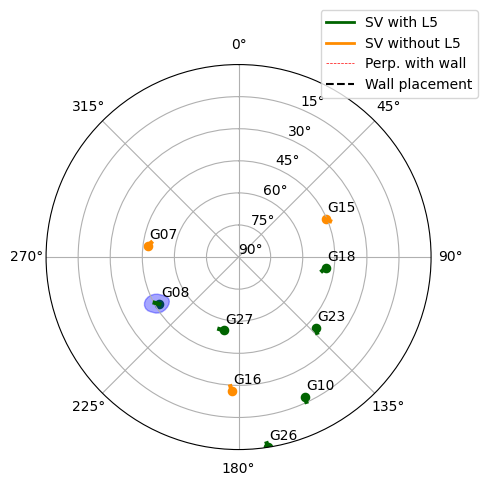

In [252]:
def plot_circle_on_polar(r): # not working yet
    theta = np.linspace(0, 2*np.pi, 100)  # Generate angles from 0 to 2*pi
    x = r * np.cos(theta)  # Calculate x coordinates
    y = r * np.sin(theta)  # Calculate y coordinates

    rho, theta = cart2pol(x,y)
    plt.polar(theta, rho)  # Plot the circle on a polar plot

def cart2pol(x, y):
    """
    source: https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates
    """
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    """
    source: https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates
    """
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='polar')
plt.polar(np.deg2rad(az[sv_with_L5,:].T),el[sv_with_L5,:].T, linewidth=3, color=col_with_L5)
plt.polar(np.deg2rad(az[sv_without_L5,:].T),el[sv_without_L5,:].T,linewidth=3, color=col_without_L5)

legend_handles = [
    plt.Line2D([], [], color=col_with_L5, linewidth=2, label='SV with L5'),
    plt.Line2D([], [], color=col_without_L5, linewidth=2, label='SV without L5'),
    plt.Line2D([], [], color='red', linewidth=0.5, linestyle='--', label='Perp. with wall'),
    plt.Line2D([], [], color='black', linewidth=1.5, linestyle='--', label='Wall placement')
]

# set theta direction and zero location
plt.gca().set_theta_direction(-1)
plt.gca().set_theta_zero_location('N')  

ticks = np.arange(90, 0, -15)
tick_labels = [f"{tick}°" for tick in ticks] 
plt.gca().set_rticks(ticks)
plt.gca().set_yticklabels(tick_labels)  
plt.gca().set_ylim(90,0)  

idx = np.zeros(np.shape(az)[0],dtype=np.int64)
for i, _ in enumerate(sv_list):
    nan_mask = np.isnan(az[i,:])
    idx[i] = len(az[i,:]) - np.argmax(np.flipud(~nan_mask)) - 1

sv_list_array = np.array(sv_list)
for i, sv in enumerate(sv_list):
    plt.annotate(sv_list[i], xy=(np.deg2rad(az[i, idx[i]]), el[i, idx[i]]),
                xytext=(1, 5), textcoords='offset points')
    if sv in sv_list_array[sv_without_L5]:
        plt.scatter(np.deg2rad(az[i, idx[i]]), el[i, idx[i]],
                    marker='o', s=35, color=col_without_L5)
    else:
        plt.scatter(np.deg2rad(az[i, idx[i]]), el[i, idx[i]],
                    marker='o', s=35, color=col_with_L5)
                
plt.title(title_string)

if not perp_from_wall == None:
    plt.polar([np.deg2rad(perp_from_wall-180),np.deg2rad(perp_from_wall)],[85,0],color='red',linewidth=1.5,linestyle='--',label=f'Perp. with wall')
    plt.polar([np.deg2rad(perp_from_wall-90-15), np.deg2rad(perp_from_wall+90+15)],[70, 70],color='black',linewidth=1.5,linestyle='--',label=f'Wall placement')
    plt.legend(handles=legend_handles,loc='upper right', bbox_to_anchor=(0.5,0.,0.6,1.05))

plt.savefig(f'../figs/skyplots/gnss_sdr/{material}/{material}_10m_gnss_sdr.png')
plt.savefig(f'../figs/skyplots/gnss_sdr/{material}/{material}_10m_gnss_sdr.pdf')

plt.legend(handles=legend_handles,loc='upper right', bbox_to_anchor=(0.55, 0., 0.59, 1.16))


input_sv = 'G08'

if input_sv in sv_list_array:
    input_sv_index = sv_list.index(input_sv)
    non_nan_idx = ~np.isnan(az[input_sv_index, :])
    edges_x, edges_y = get_edges_of_polygon(az[input_sv_index, non_nan_idx], el[input_sv_index, non_nan_idx], radius=5, num_points=20)

    plt.fill(np.deg2rad(edges_x), edges_y, color='blue', alpha=0.35)
    plt.savefig(f'../figs/skyplots/gnss_sdr/{material}/{material}_10m_gnss_sdr_{input_sv}_focused.pdf')
    plt.savefig(f'../figs/skyplots/gnss_sdr/{material}/{material}_10m_gnss_sdr_{input_sv}_focused.png')
plt.show()

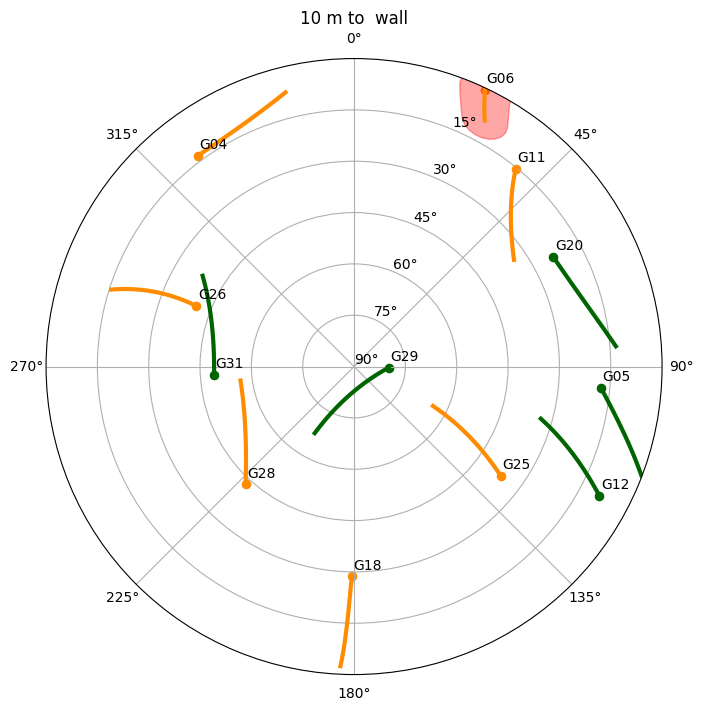

In [185]:
input_sv = 'G06'

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
plt.polar(np.deg2rad(az[sv_with_L5,:].T),el[sv_with_L5,:].T, linewidth=3, color=col_with_L5)
plt.polar(np.deg2rad(az[sv_without_L5,:].T),el[sv_without_L5,:].T,linewidth=3, color=col_without_L5)

# set theta direction and zero location
plt.gca().set_theta_direction(-1)
plt.gca().set_theta_zero_location('N')  

ticks = np.arange(90, 0, -15)
tick_labels = [f"{tick}°" for tick in ticks] 
plt.gca().set_rticks(ticks)
plt.gca().set_yticklabels(tick_labels)  
plt.gca().set_ylim(90,0)  

idx = np.zeros(np.shape(az)[0],dtype=np.int64)
for i, _ in enumerate(sv_list):
    nan_mask = np.isnan(az[i,:])
    idx[i] = len(az[i,:]) - np.argmax(np.flipud(~nan_mask)) - 1

sv_list_array = np.array(sv_list)
for i, sv in enumerate(sv_list):
    plt.annotate(sv_list[i], xy=(np.deg2rad(az[i, idx[i]]), el[i, idx[i]]),
                xytext=(1, 5), textcoords='offset points')
    if sv in sv_list_array[sv_without_L5]:
        plt.scatter(np.deg2rad(az[i, idx[i]]), el[i, idx[i]],
                    marker='o', s=35, color=col_without_L5)
    else:
        plt.scatter(np.deg2rad(az[i, idx[i]]), el[i, idx[i]],
                    marker='o', s=35, color=col_with_L5)

if input_sv in sv_list_array:
    input_sv_index = sv_list.index(input_sv)
    non_nan_idx = ~np.isnan(az[input_sv_index, :])
    edges_x, edges_y = get_edges_of_polygon(az[input_sv_index, non_nan_idx], el[input_sv_index, non_nan_idx], radius=5, num_points=20)

    #plt.scatter(np.deg2rad(edges_x), edges_y, color='red', alpha=0.5)
    plt.fill(np.deg2rad(edges_x), edges_y, color='red', alpha=0.35)


plt.title(title_string)
plt.show()

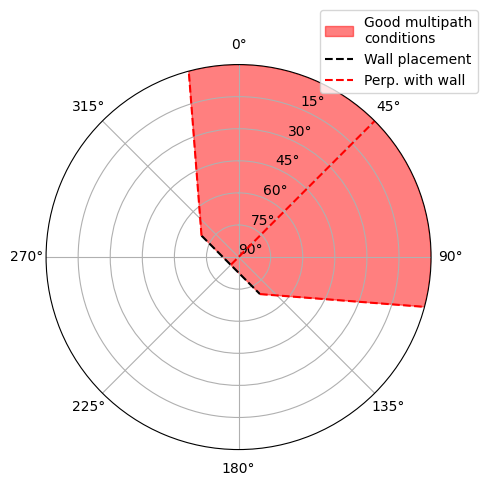

In [17]:
import numpy as np
import matplotlib.pyplot as plt

perp_from_wall = 45

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='polar')

# Set theta direction and zero location
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')  

# Set radial ticks and labels
ticks = np.arange(90, 0, -15)
tick_labels = [f"{tick}°" for tick in ticks] 
ax.set_rticks(ticks)
ax.set_yticklabels(tick_labels)  
ax.set_ylim(90,0)  


lower_limit = perp_from_wall - 60
upper_limit = perp_from_wall + 60

thetas = np.arange(lower_limit, upper_limit, 5)

# Define the points for the wall placement and the filling region
theta1 = np.deg2rad(perp_from_wall - 90 - 15)
theta2 = np.deg2rad(perp_from_wall + 90 + 15)
theta3 = np.deg2rad(perp_from_wall - 60)
theta4 = np.deg2rad(perp_from_wall + 60)

thetas = np.concatenate(([theta2, theta1, theta3], np.deg2rad(thetas)))
thetas = np.concatenate((thetas, [theta4]))

# Define the radius at the edge
r_edge = 70

rs = np.concatenate(([r_edge, r_edge, 0], np.zeros_like(np.arange(lower_limit, upper_limit, 5))))
rs = np.concatenate((rs, [0]))

# Fill the specified region
ax.fill(thetas, rs, color='red', alpha=0.5, label='Good multipath\nconditions')

# Plot the lines
ax.plot([theta1, theta2], [70, 70], color='black', linewidth=1.5, linestyle='--', label='Wall placement')
ax.plot([theta1, theta3], [70, 0], color='red', linewidth=1.5, linestyle='--')
ax.plot([theta2, theta4], [70, 0], color='red', linewidth=1.5, linestyle='--')
ax.plot([np.deg2rad(perp_from_wall-180),np.deg2rad(perp_from_wall)],[85,0],color='red',linewidth=1.5,linestyle='--',label=f'Perp. with wall')

plt.legend(loc='upper right', bbox_to_anchor=(0.55, 0., 0.59, 1.16))
plt.savefig(f'../figs/Report/Method/Skyplot_for_good_multipath_conditions.png')
plt.savefig(f'../figs/Report/Method/Skyplot_for_good_multipath_conditions.pdf')
plt.show()


In [149]:
import pandas as pd
def read_gps_azimuth_elevation(file_path):
    gps_data = []

    with open(file_path, 'r') as file:
        for line in file:
            # Skip lines that are headers or separators
            if line.startswith('-') or 'SVID' in line:
                continue

            parts = line.strip().split(',')
            if len(parts) < 15:
                continue

            svid = parts[2].strip()
            if svid.startswith('G'):
                try:
                    tow = float(parts[0])
                    azimuth = float(parts[4])
                    elevation = float(parts[14])
                    gps_data.append((tow, svid, azimuth, elevation))
                except ValueError:
                    # Handle missing or non-numeric data
                    continue

    # Create DataFrame from the list of tuples
    df = pd.DataFrame(gps_data, columns=['tow', 'SVID', 'azimuth', 'elevation'])
    return df

In [150]:
# Example usage:
file_path = '../Data/glass_wall/distance_correlations/210424/3633416_glass_diff_dist_10m.sbf_SBF_ChannelStatus.txt'  # Replace with the actual file path
df = read_gps_azimuth_elevation(file_path)
sv_list = np.unique(df['SVID'])
# print(df[df['SVID'] == 'G29']['azimuth'].values[222])
print(sv_list)

['G05' 'G07' 'G08' 'G10' 'G13' 'G15' 'G16' 'G18' 'G23' 'G26' 'G27' 'G29'
 'G30' 'G31']


In [122]:
def moving_average(arr, window_size=14):
    padded_arr = np.pad(arr, (window_size // 2, window_size // 2), mode='edge')
    cumsum = np.cumsum(padded_arr)
    moving_avg = (cumsum[window_size:] - cumsum[:-window_size]) / window_size
    return moving_avg


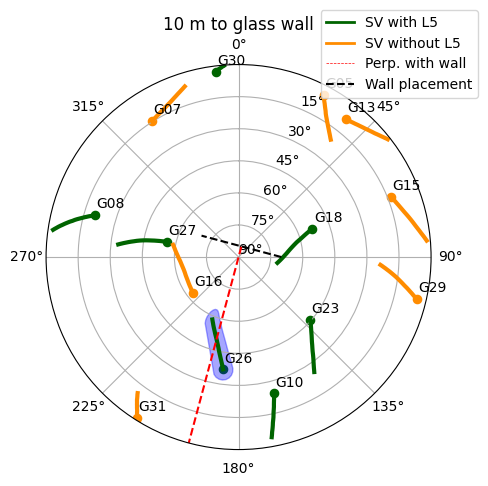

In [155]:
file_path = '../Data/glass_wall/distance_correlations/210424/3633416_glass_diff_dist_10m.sbf_SBF_ChannelStatus.txt'  # Replace with the actual file path
df = read_gps_azimuth_elevation(file_path)
sv_list = np.unique(df['SVID'])

perp_from_wall = 195
title_string = f'10 m to glass wall'

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='polar')
plt.title(title_string)
col = 'purple'
legend_handles = [
    plt.Line2D([], [], color=col_with_L5, linewidth=2, label='SV with L5'),
    plt.Line2D([], [], color=col_without_L5, linewidth=2, label='SV without L5'),
    plt.Line2D([], [], color='red', linewidth=0.5, linestyle='--', label='Perp. with wall'),
    plt.Line2D([], [], color='black', linewidth=1.5, linestyle='--', label='Wall placement')
]
# legend_handles = [
#     plt.Line2D([], [], color=col, linewidth=2, label='SV'),
#     plt.Line2D([], [], color='red', linewidth=0.5, linestyle='--', label='Perp. with wall'),
#     plt.Line2D([], [], color='black', linewidth=1.5, linestyle='--', label='Wall placement')
# ]

sv_with_L5 = ['G03','G04','G06','G08','G09','G10','G11','G14','G18','G23','G24','G25','G26','G27','G28','G30','G32']

num = np.zeros(len(sv_list),dtype=np.int64)

for i, sv in enumerate(sv_list):
    if sv == 'E04':
        continue
    num[i] = len(df[df['SVID'] == sv]['elevation'])//20
    if sv in sv_with_L5:
        ax.plot(moving_average(np.deg2rad(df[df['SVID'] == sv]['azimuth'][0::num[i]])), moving_average(df[df['SVID'] == sv]['elevation'][0::num[i]]), linewidth=3, color=col_with_L5)
    else:
        ax.plot(moving_average(np.deg2rad(df[df['SVID'] == sv]['azimuth'][0::num[i]])), moving_average(df[df['SVID'] == sv]['elevation'][0::num[i]]), linewidth=3, color=col_without_L5)

# Set theta direction and zero location
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')  

# Set radial ticks and labels
ticks = np.arange(90, 0, -15)
tick_labels = [f"{tick}°" for tick in ticks] 
ax.set_rticks(ticks)
ax.set_yticklabels(tick_labels)  
ax.set_ylim(90,0)  

idx = np.zeros(len(sv_list),dtype=np.int64)
for i, sv in enumerate(sv_list):
    if sv == 'E04':
        continue
    nan_mask = np.isnan(df[df['SVID'] == sv]['azimuth'])
    # idx[i] = len(df[df['SVID'] == sv]['azimuth'][0::num[i]]) - np.argmax(np.flipud(~nan_mask)) - 1
    idx[i] = len(moving_average(np.deg2rad(df[df['SVID'] == sv]['azimuth'][0::num[i]])))

sv_list_array = np.array(sv_list)
for i, sv in enumerate(sv_list):
    if sv == 'E04':
        continue
    az = np.deg2rad(df[df['SVID'] == sv]['azimuth'].values)
    el = df[df['SVID'] == sv]['elevation'].values
    az = moving_average(az[0::num[i]])
    el = moving_average(el[0::num[i]])
    plt.annotate(sv_list[i], xy=(az[idx[i]-1], el[idx[i]-1]),
                xytext=(1, 5), textcoords='offset points')
    if sv in sv_with_L5:
        plt.scatter(az[idx[i]-1], el[idx[i]-1],
                    marker='o', s=35, color=col_with_L5)
    else:
        plt.scatter(az[idx[i]-1], el[idx[i]-1],
                    marker='o', s=35, color=col_without_L5)

plt.plot([np.deg2rad(perp_from_wall-180),np.deg2rad(perp_from_wall)],[85,0],color='red',linewidth=1.5,linestyle='--',label=f'Perp. with wall')
plt.plot([np.deg2rad(perp_from_wall-90-15), np.deg2rad(perp_from_wall+90+15)],[70, 70],color='black',linewidth=1.5,linestyle='--',label=f'Wall placement')

plt.legend(handles=legend_handles,loc='upper right', bbox_to_anchor=(0.55, 0., 0.59, 1.16))

plt.savefig(f'../figs/skyplots/glass_10m_210424_GPS.pdf')
plt.savefig(f'../figs/skyplots/glass_10m_210424_GPS.png')

input_sv = 'G26'

if input_sv in sv_list:
    input_sv_index = np.where(sv_list == input_sv)[0][0]
    az = df[df['SVID'] == input_sv]['azimuth'].values
    el = df[df['SVID'] == input_sv]['elevation'].values
    az = moving_average(az[0::num[input_sv_index]])
    el = moving_average(el[0::num[input_sv_index]])
    edges_x, edges_y = get_edges_of_polygon(az, el, radius=5, num_points=20)

    #plt.scatter(np.deg2rad(edges_x), edges_y, color='red', alpha=0.5)
    plt.fill(np.deg2rad(edges_x), edges_y, color='blue', alpha=0.35)
    plt.savefig(f'../figs/skyplots/glass_10m_210424_GPS_{input_sv}_focused.pdf')
    plt.savefig(f'../figs/skyplots/glass_10m_210424_GPS_{input_sv}_focused.png')

plt.show()


In [ ]:

perp_from_wall = 45

plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')

# Set theta direction and zero location
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')  

# Set radial ticks and labels
ticks = np.arange(90, 0, -15)
tick_labels = [f"{tick}°" for tick in ticks] 
ax.set_rticks(ticks)
ax.set_yticklabels(tick_labels)  
ax.set_ylim(90,0)  


plt.legend(loc='upper right', bbox_to_anchor=(0.55, 0., 0.55, 1.1))